## Learning Curve

Types of learning curve:
1. Underfitting: This is where both training and validation error are high, meaning model is not learning well even on the training data. 
2. Overfitting: This is when the training error is low but hte validation error is high indicating that model is memorzing the training data. 
3. Just Right: This is ideal case, where both training and validation errors decrease over time and eventually stablize. 


In [2]:
# Libraries: 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [15]:
# Load dataset 
data = load_iris()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create the model 
model = SVC(kernel='linear')

In [19]:
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv= 5, n_jobs=-1, train_sizes = np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation for the train and validation score

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis = 1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis = 1)


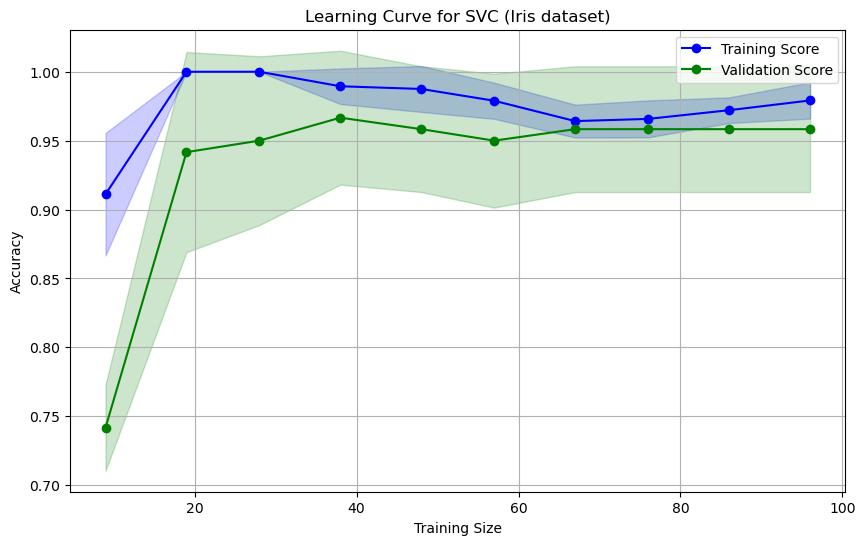

In [24]:
# Visualize the learning curve. 

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, color = 'blue', label = 'Training Score', marker = 'o')
plt.plot(train_sizes, val_mean, color = 'green', label = 'Validation Score', marker = 'o')

# Add shaded region of standard deviation 
plt.fill_between(train_sizes, train_mean-train_std, train_mean+ train_std, color = 'blue', alpha = 0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+ val_std, color = 'green', alpha = .2)

plt.title('Learning Curve for SVC (Iris dataset)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()